In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde

In [4]:
# See data/REAMD.md for longer names/details.
columns = ['x acc', 'y acc', 'z acc', 'label']
labels = ['Computer', 'Moving', 'Standing', 'Walking', 'Stairs',
          'Walking + talking', 'Standing + talking']
labels_map = {
    1: 'Computer',
    2: 'Moving',
    3: 'Standing',
    4: 'Walking',
    5: 'Stairs',
    6: 'Walking + talking',
    7: 'Standing + talking'
}

# usecols is used to skip reading the 'id' column, which has errors
ad = pd.read_csv('data/1.csv', sep=',', header=None, names=columns,
                 usecols=[1,2,3,4])

# TODO: put some reasonable values here
x_min_max = (1455, 2356)
y_min_max = (1697, 2713)
z_min_max = (1644, 2739)

for column in columns:
    if column == 'label':
        # drop row with not a valid label
        ad = ad.loc[(1 <= ad['label']) & (ad['label'] <= 7), :]
        print(ad[column].value_counts())
    if column == 'x acc':
        # TODO detect anomalies
        #print(ad[column].sort_values().tail(40))
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'y acc':
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'z acc':
        print(column, 'min max:', ad[column].min(), ad[column].max())

ad['label'] = ad['label'].map(labels_map)


x acc min max: 1455 2356
y acc min max: 1697 2713
z acc min max: 1644 2739
7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64


In [ ]:
scatter_matrix(ad, alpha=.2, figsize=(16,16), diagonal='hist')
# plt.savefig('scattermat.png')

In [ ]:
def explore_acc(feature='x acc'):
    feat = ad[feature]
    print(f"{feature} min: {ad[feature].min()}, max: {ad[feature].max()}")
    # show statistics
    print(feat.value_counts(bins=10, normalize=True, sort=False))
    # plot distribution
    print(feat.plot.hist(bins=100))
    plt.xlabel(feature)

explore_acc()


In [ ]:
def explore_label():
    feat = ad['label']

    # Show statistics and dirstibution
    print(feat.value_counts(normalize=True, sort=True))
    feat.value_counts(normalize=True, sort=True).plot.pie()

explore_label()

In [14]:
accs = ['x acc', 'y acc', 'z acc']

<ipython-input-12-d66c478aab11>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-d66c478aab11>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-d66c478aab11>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


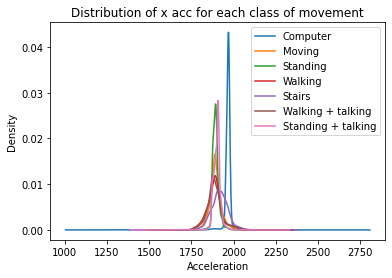

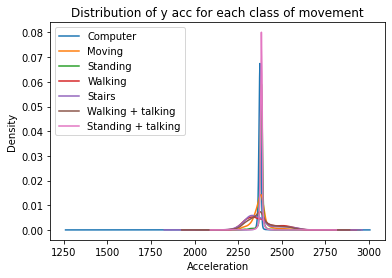

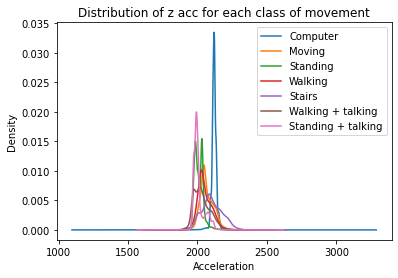

In [12]:
# Explore pair of attributes (columns)
# plot labels against each acceleration
for acc in accs:
    fig, ax = plt.subplots(1, 1)

    for label in labels:
        label_acc = ad.loc[ad['label'] == label, acc]
        label_acc.plot.kde()

    plt.title(f"Distribution of {acc} for each class of movement")
    plt.xlabel('Acceleration')
    plt.ylabel('Density')
    plt.legend(labels)
    fig.show()
    #break


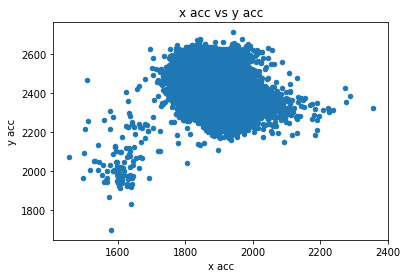

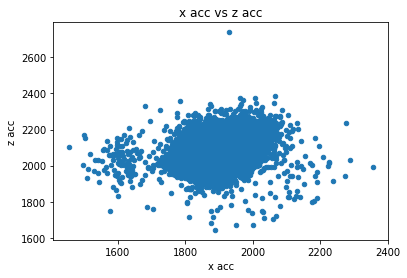

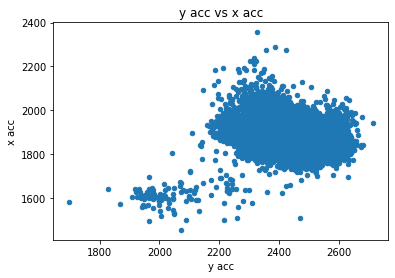

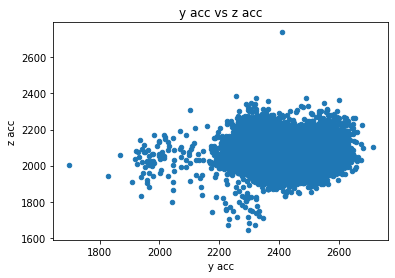

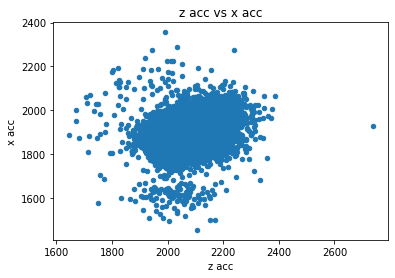

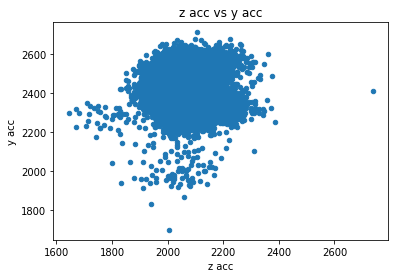

In [17]:
for acc in accs:
    for acc2 in accs:
        if acc == acc2: continue
        ad.plot.scatter(x=acc, y=acc2)
        plt.title(f"{acc} vs {acc2}")
        plt.xlabel(f"{acc}")
        plt.ylabel(f"{acc2}")
        plt.show()